<a href="https://colab.research.google.com/github/Dhivyaganapathi/K-means-clustering-algorithm-to-group-customers/blob/main/K_means_clustering_to_group_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

# **Data Exploration**

In [3]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# **Data Visualization**

In [ ]:
plt.style.use("fivethirtyeight")

# **Histograms**

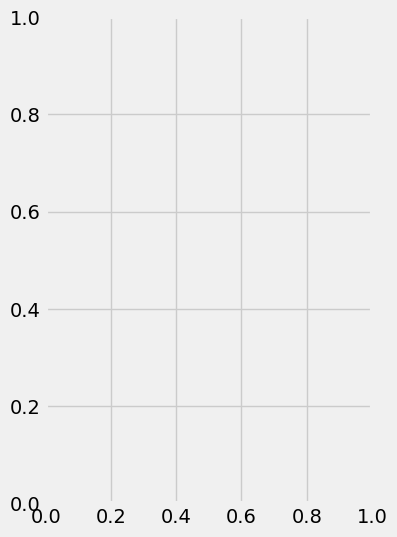

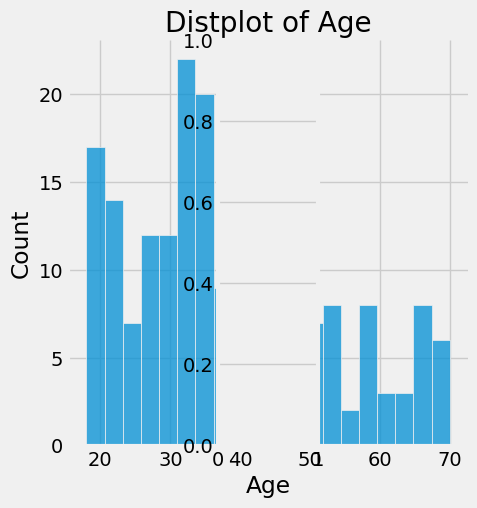

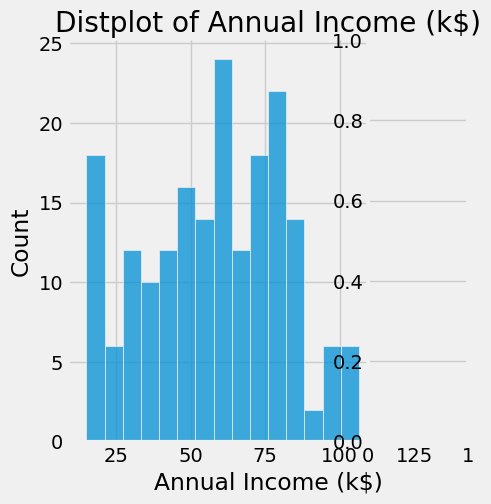

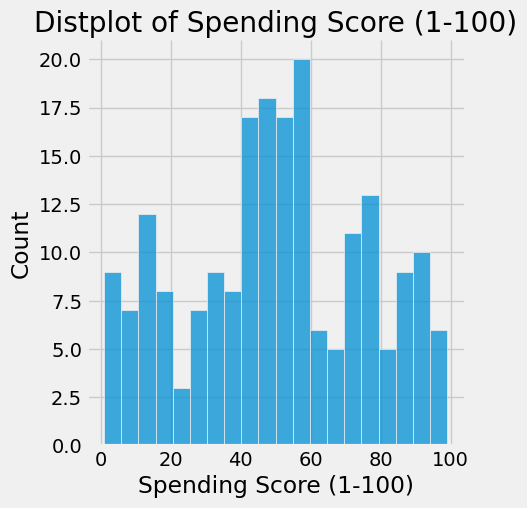

In [ ]:
plt.figure(1,figsize=(15,6))
n=0
for x in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
  n += 1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  sns.displot(df[x] , bins = 20)
  plt.title("Distplot of {}".format(x))
plt.show()

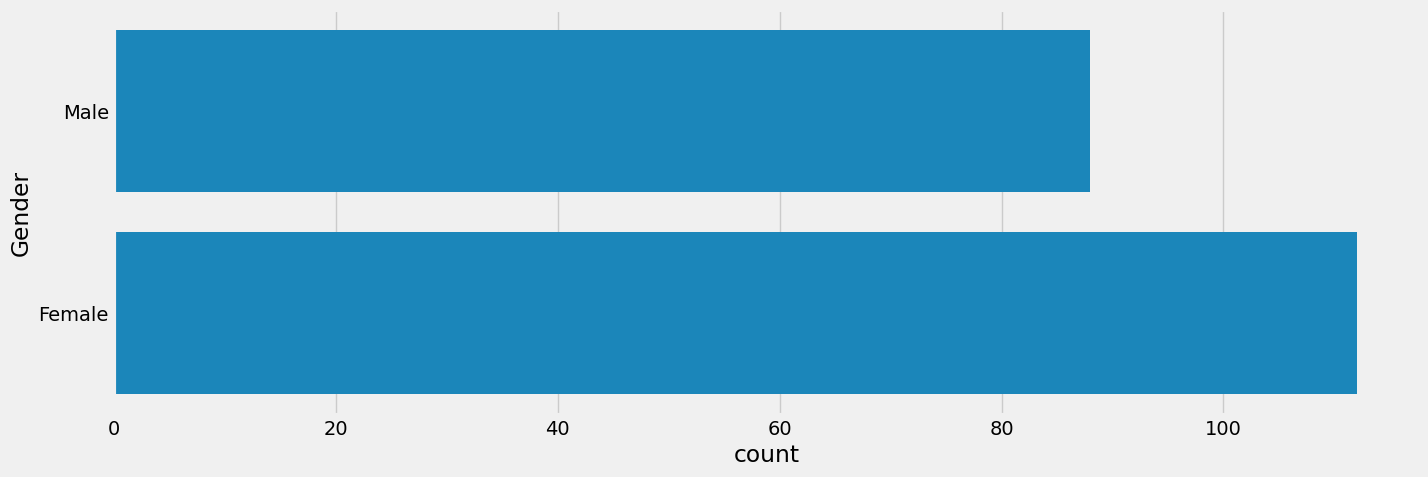

In [ ]:
plt.figure(1,figsize=(15,5))
sns.countplot(y = "Gender" , data = df)
plt.show()

# **Ploting the Relation between Age,Annual income and spending score**

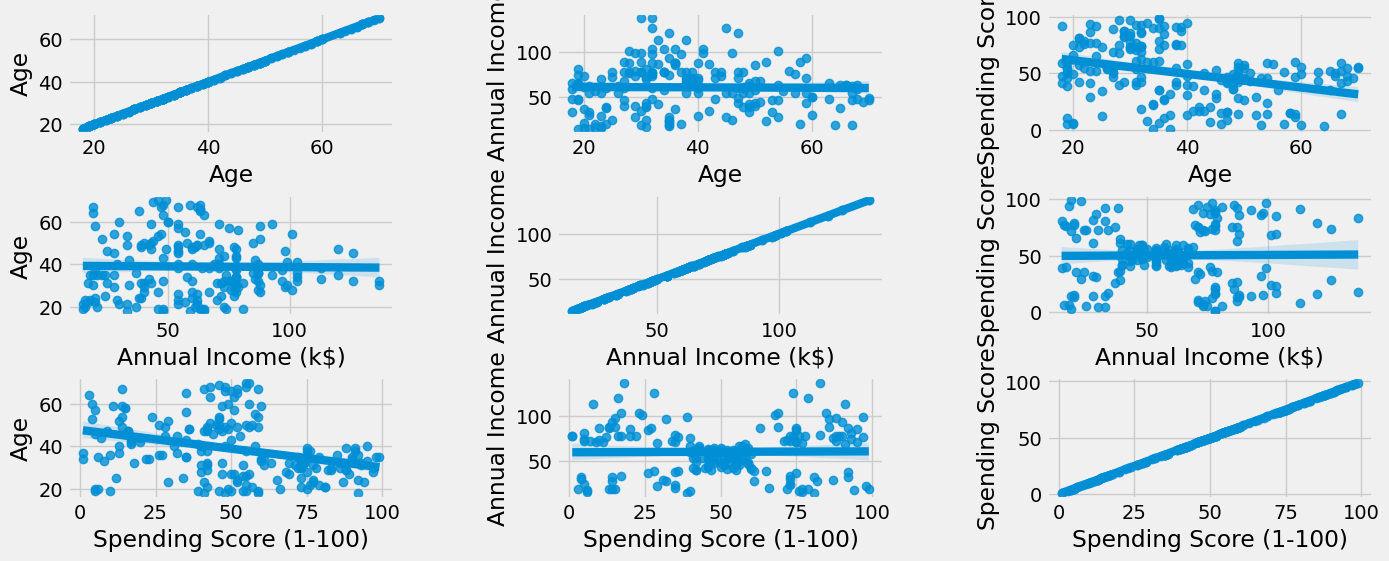

In [ ]:
plt.figure(1,figsize=(15,6))
n=0
for x in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
  for y in ["Age","Annual Income (k$)","Spending Score (1-100)"]:
    n += 1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.regplot(x = x , y = y , data = df)
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()

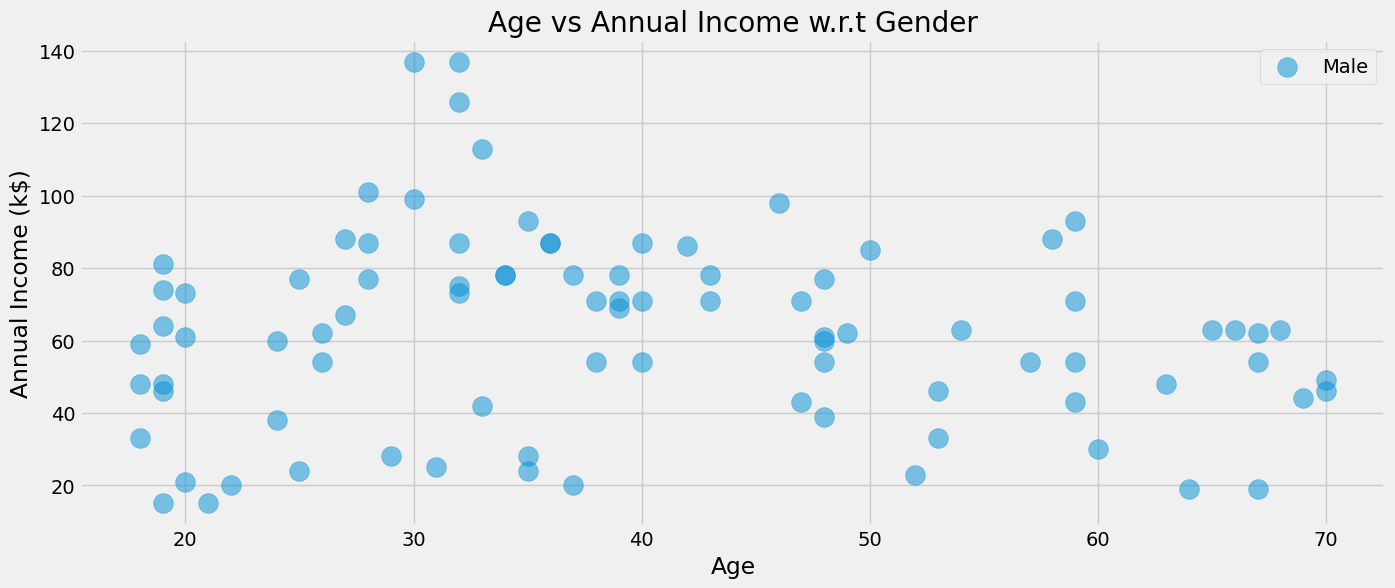

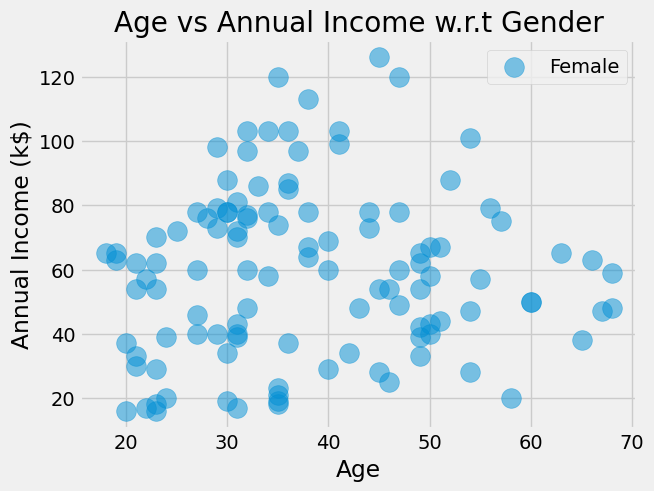

In [ ]:
plt.figure(1,figsize = (15,6))
for gender in ['Male','Female']:
  plt.scatter(x ='Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender], s = 200 , alpha = 0.5 , label = gender)
  plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')
  plt.title('Age vs Annual Income w.r.t Gender')
  plt.legend()
  plt.show()

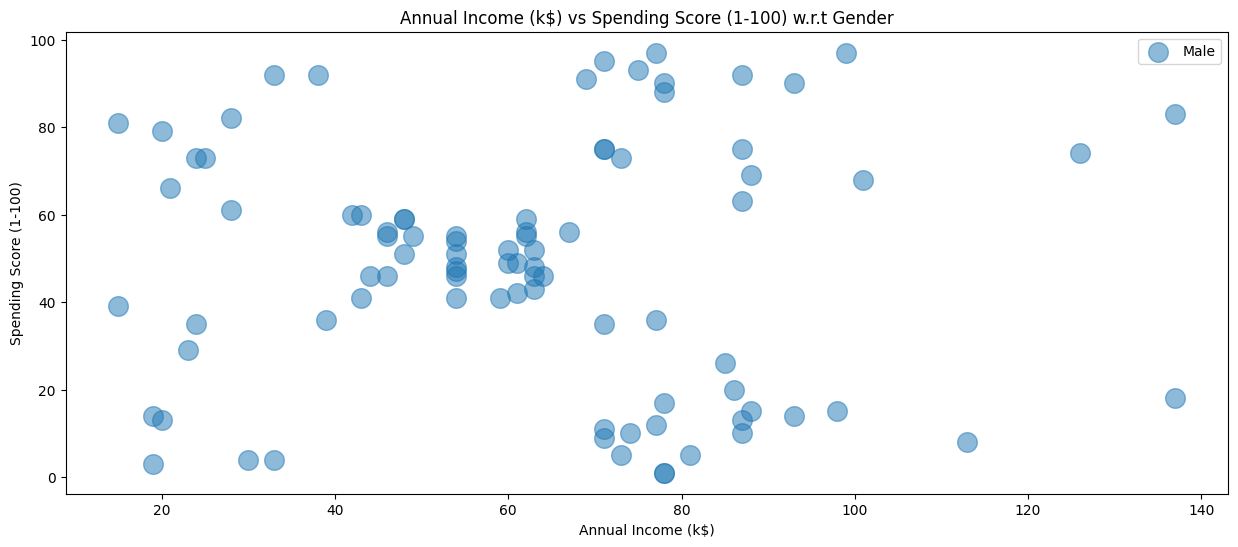

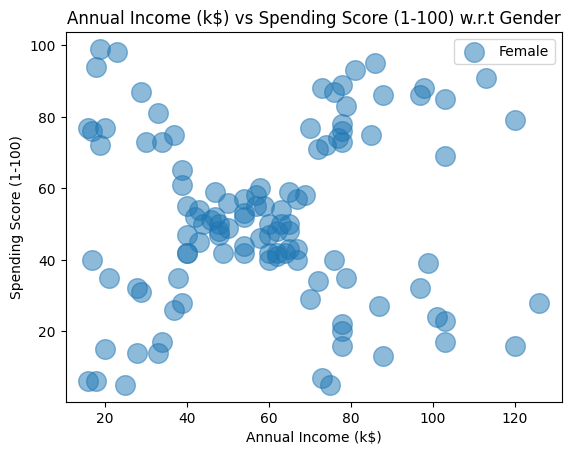

In [8]:
plt.figure(1,figsize = (15,6))
for gender in ['Male','Female']:
  plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' , data = df[df['Gender'] == gender], s = 200 , alpha = 0.5 , label = gender)
  plt.xlabel('Annual Income (k$)'),plt.ylabel('Spending Score (1-100)')
  plt.title('Annual Income (k$) vs Spending Score (1-100) w.r.t Gender')
  plt.legend()
  plt.show()

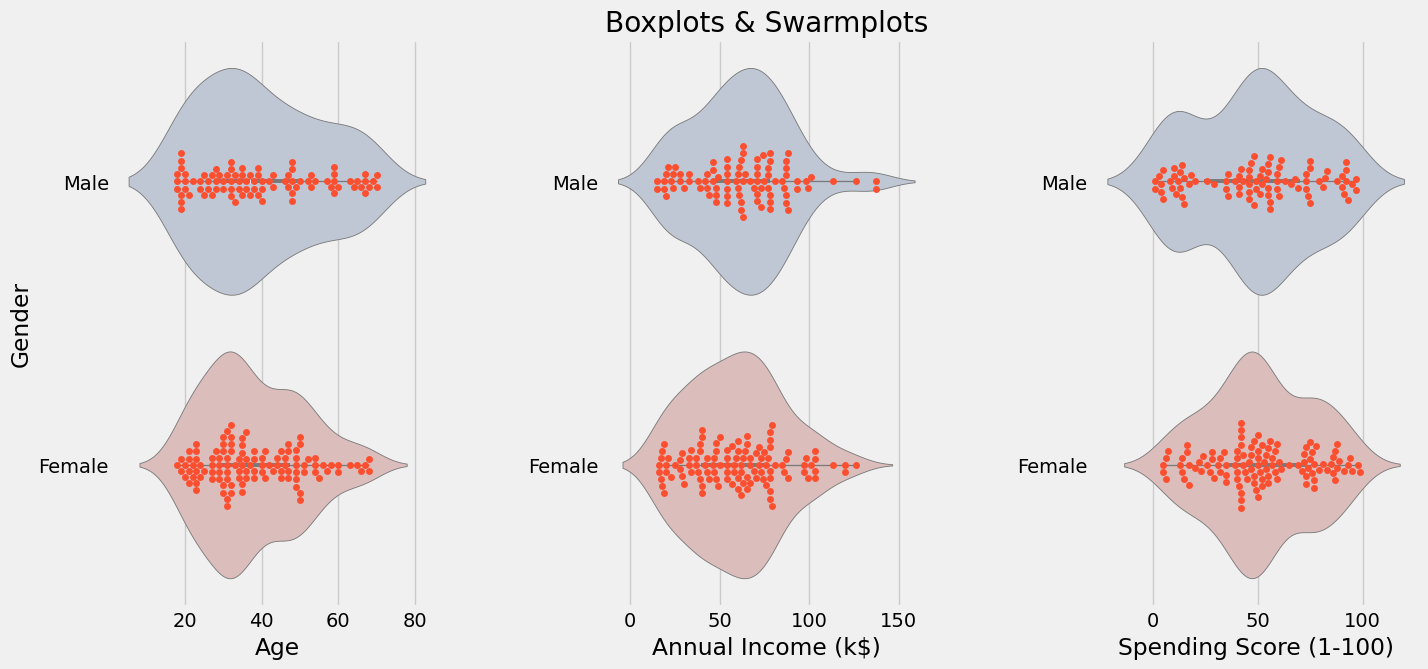

In [ ]:
plt.figure(1,figsize = (15,7))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x=cols,y='Gender',data=df,palette='vlag')
  sns.swarmplot(x=cols,y='Gender',data=df)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Boxplots & Swarmplots' if n==2 else '')
plt.show()

# Clustering using K- means

**1.Segmentation using age and spending score**

In [4]:
'''Age and spending score'''
# Assuming your column names are 'Age' and 'Spending Score (1-100)'
x1 = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values
# Corrected column names to match the DataFrame
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan'))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_) # Changed 'inertia' to 'inertia_'

# Building the model

In [5]:
from sklearn.cluster import kmeans_plusplus
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)

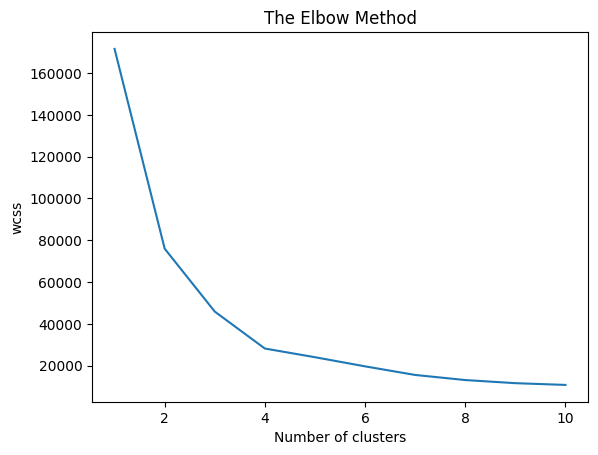

In [6]:
#visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

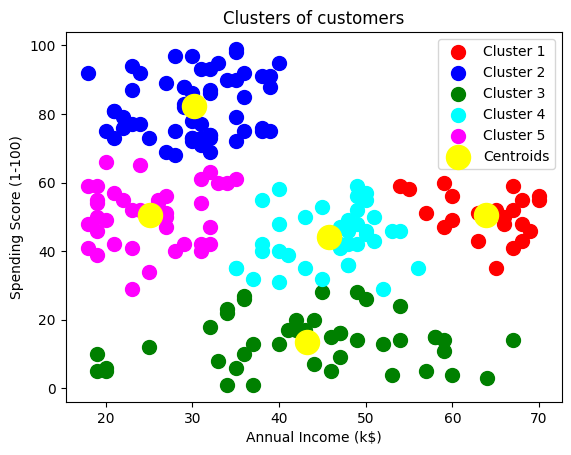

In [11]:
# Assuming x1 is your feature data
X = x1

# Perform KMeans clustering with the desired number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

#visualizing all the clusters
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s=100 , c='red',label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s=100 , c='blue',label='Cluster 2') # Corrected y_kmeans index
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s=100 , c='green',label='Cluster 3') # Corrected y_kmeans index
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s=100 , c='cyan',label='Cluster 4') # Corrected y_kmeans index
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s=100 , c='magenta',label='Cluster 5') # Corrected y_kmeans index
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)') # Assuming your feature represents annual income
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()